In [5]:

import pandas as pd

data = pd.read_csv("./YouTubeDatasets/ClassifiedData.csv",index_col=0)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [2]:
data.columns = data.columns.str.replace(" ","_").str.lower()

print(data.columns)


Index(['wtt', 'pti', 'eqw', 'sbi', 'lqe', 'qwg', 'fdj', 'pjf', 'hqe', 'nxj',
       'target_class'],
      dtype='object')


In knn, since it uses the eucledian and manhattan distance, so the distance between the variables plays an important role.

So we need to scale the data before using the knn algo

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df = scaler.fit_transform(data.drop('target_class',axis=1))
df = pd.DataFrame(df,columns = data.columns[:-1])
df.head()



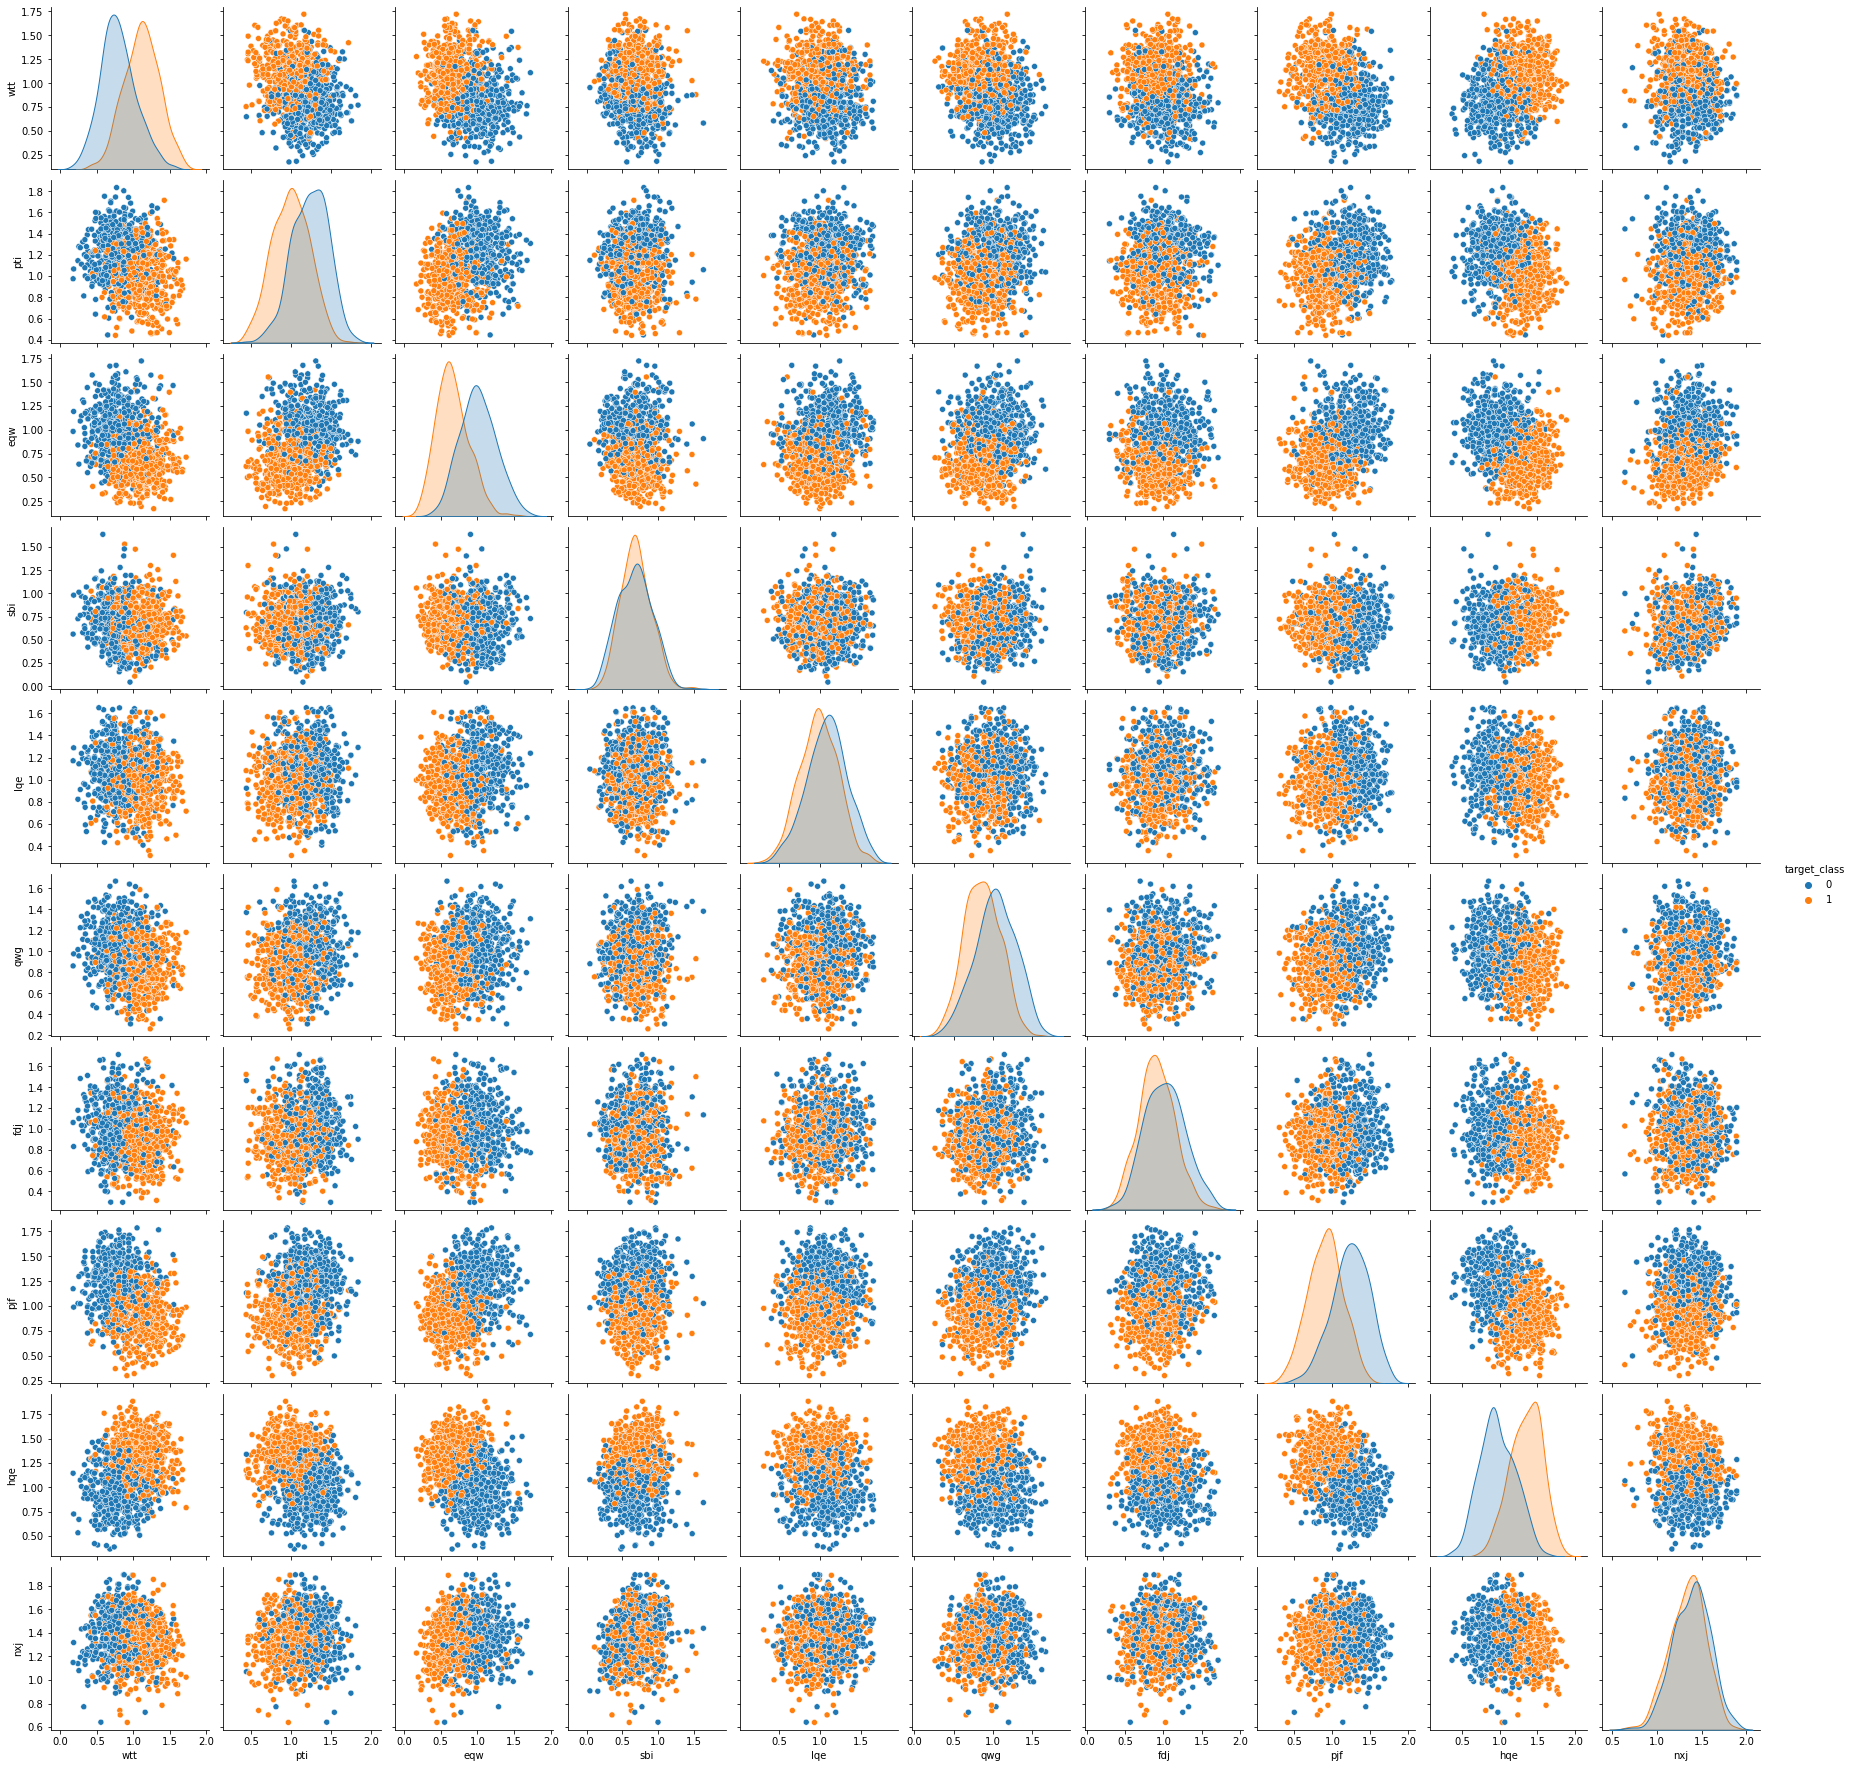

In [ ]:
import seaborn as sns
sns.pairplot(data,hue='target_class')

## from paiplot is pretty sure that we won;t be able to apply linear or logistic regression
## the distribution has so many overlapped things that logistic reg will fail to answer

In [ ]:
from sklearn.model_selection import train_test_split

X = df
y = data['target_class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

model = knn.fit(X_train,y_train)

y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.945

## Evaluation metrics

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[91  7]
 [ 4 98]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        98
           1       0.93      0.96      0.95       102

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [ ]:
## but k==1, so we can't say anything now

error_rate=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,df,data['target_class'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error rate for given K value')

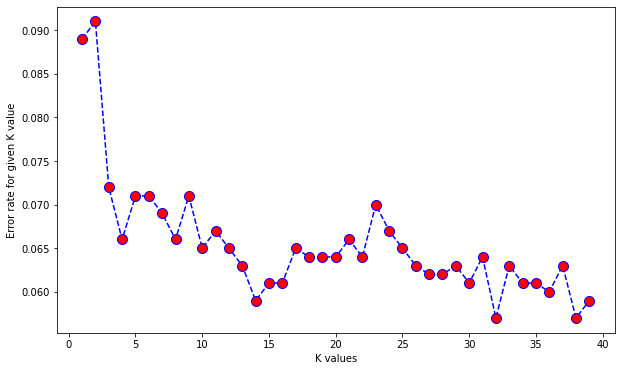

In [ ]:
## lets see the plot between k value and error rate
## less the error rate, better the model and thats your k value

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel("K values")
plt.ylabel("Error rate for given K value")


## see after the k value of 23 or 24, it had started decreasing and it has never came up
## so lets take the value of k==23

In [ ]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

knn.score(X_test,y_test)

0.955

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[94  4]
 [ 5 97]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        98
           1       0.96      0.95      0.96       102

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200

